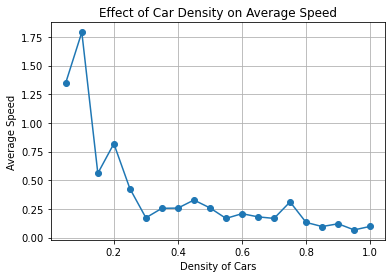

In [25]:
import numpy as np
from car_simulation import (initialize_road,move_car,calculate_average_speed)
import matplotlib.pyplot as plt
 
#Update the tarffic simulation model with respect to the density 
def simulate_traffic_for_density(road_length, density, num_iterations, v_max=5):
    num_cars = int(road_length * density)
    road, car_positions = initialize_road(road_length, num_cars, v_max)
    average_speeds = [] #create an empty speed array

    for _ in range(num_iterations):
        for i in range(len(car_positions)):
            current_pos = car_positions[i]
            car = road[current_pos]
            next_pos = move_car(car, current_pos, road_length)
            road[current_pos] = -1
            car_positions[i] = next_pos
            road[next_pos] = car

        average_speed = calculate_average_speed(road)
        average_speeds.append(average_speed)

    return average_speeds

if __name__ == "__main__":
    road_length = 100
    num_iterations = 100
    densities = np.linspace(0.05, 1.0, num=20)  # Span the density from 0.05-1.0, so the simulation runs through this range
    average_speed_results = []

    for density in densities:
        average_speeds = simulate_traffic_for_density(road_length, density, num_iterations)
        average_speed_results.append(np.mean(average_speeds))

    plt.plot(densities, average_speed_results, marker='o')
    plt.xlabel("Density of Cars")
    plt.ylabel("Average Speed")
    plt.title("Effect of Car Density on Average Speed")
    plt.grid(True)
    plt.show()
